In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [48]:
auto_MPG = pd.read_csv("../dataset/auto_MPG.csv").dropna(how="any", axis=0)

In [49]:
auto_MPG.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model,origin,car name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino


In [50]:
auto_MPG.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model,origin
count,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000
mean,23.445918,5.471939,194.411990,104.469388,2977.584184,15.541327,75.979592,1.576531
std,7.805007,1.705783,104.644004,38.491160,849.402560,2.758864,3.683737,0.805518
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.000000,4.000000,105.000000,75.000000,2225.250000,13.775000,73.000000,1.000000
50%,22.750000,4.000000,151.000000,93.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,275.750000,126.000000,3614.750000,17.025000,79.000000,2.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,3.000000


論文によると目的変数と適度に相関のある変数でソートし、high, medium, lowの3グループに分類する(その変数は削除)

In [51]:
# 目的変数(Concrete compressive strength)との相関
auto_MPG.corr().iloc[0,:].sort_values()

weight         -0.832244
displacement   -0.805127
horsepower     -0.778427
cylinders      -0.777618
acceleration    0.423329
origin          0.565209
model           0.580541
mpg             1.000000
Name: mpg, dtype: float64

"Superplasticizer"を分割のための変数とする

In [52]:
auto_MPG_sorted = auto_MPG.sort_values("acceleration").reset_index(drop=True)
auto_MPG_sorted

,mpg,cylinders,displacement,horsepower,weight,acceleration,model,origin,car name
0,14.0,8,340.0,160.0,3609.0,8.0,70,1,plymouth 'cuda 340
1,14.0,8,440.0,215.0,4312.0,8.5,70,1,plymouth fury iii
2,15.0,8,390.0,190.0,3850.0,8.5,70,1,amc ambassador dpl
3,14.0,8,454.0,220.0,4354.0,9.0,70,1,chevrolet impala
4,16.0,8,400.0,230.0,4278.0,9.5,73,1,pontiac grand prix
...,...,...,...,...,...,...,...,...,...
387,23.9,8,260.0,90.0,3420.0,22.2,79,1,oldsmobile cutlass salon brougham
388,23.0,4,97.0,54.0,2254.0,23.5,72,2,volkswagen type 3
389,43.4,4,90.0,48.0,2335.0,23.7,80,2,vw dasher (diesel)
390,44.0,4,97.0,52.0,2130.0,24.6,82,2,vw pickup


95


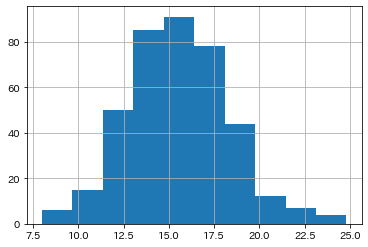

In [53]:
# "Superplasticizerが同じ値ばっかりになってそうなのでuniqueの数をチェック
print(len(auto_MPG_sorted["acceleration"].unique()))
# concrete_strength["Superplasticizer (component 5)(kg in a m^3 mixture)"].value_counts()
auto_MPG_sorted["acceleration"].hist()

左に寄ったグラフだけど大丈夫かな？

In [54]:
low = auto_MPG_sorted[:len(auto_MPG_sorted)//3]
medium = auto_MPG_sorted[len(auto_MPG_sorted)//3: (len(auto_MPG_sorted)//3)*2]
high = auto_MPG_sorted[(len(auto_MPG_sorted)//3)*2:]

In [55]:
low

,mpg,cylinders,displacement,horsepower,weight,acceleration,model,origin,car name
0,14.0,8,340.0,160.0,3609.0,8.0,70,1,plymouth 'cuda 340
1,14.0,8,440.0,215.0,4312.0,8.5,70,1,plymouth fury iii
2,15.0,8,390.0,190.0,3850.0,8.5,70,1,amc ambassador dpl
3,14.0,8,454.0,220.0,4354.0,9.0,70,1,chevrolet impala
4,16.0,8,400.0,230.0,4278.0,9.5,73,1,pontiac grand prix
...,...,...,...,...,...,...,...,...,...
125,27.9,4,156.0,105.0,2800.0,14.4,80,1,dodge colt
126,25.8,4,156.0,92.0,2620.0,14.4,81,1,dodge aries wagon (sw)
127,35.7,4,98.0,80.0,1915.0,14.4,79,1,dodge colt hatchback custom
128,18.0,6,171.0,97.0,2984.0,14.5,75,1,ford pinto


In [56]:
medium

,mpg,cylinders,displacement,horsepower,weight,acceleration,model,origin,car name
130,14.0,8,302.0,137.0,4042.0,14.5,73,1,ford gran torino
131,22.0,6,250.0,105.0,3353.0,14.5,76,1,chevrolet nova
132,22.0,4,121.0,98.0,2945.0,14.5,75,2,volvo 244dl
133,28.0,4,90.0,75.0,2125.0,14.5,74,1,dodge colt
134,27.0,4,97.0,88.0,2130.0,14.5,71,3,datsun pl510
...,...,...,...,...,...,...,...,...,...
255,28.0,4,97.0,75.0,2155.0,16.4,76,3,toyota corolla
256,26.0,4,122.0,80.0,2451.0,16.5,74,1,ford pinto
257,21.0,4,122.0,86.0,2226.0,16.5,72,1,ford pinto runabout
258,25.0,4,90.0,71.0,2223.0,16.5,75,2,volkswagen dasher


In [57]:
high

,mpg,cylinders,displacement,horsepower,weight,acceleration,model,origin,car name
260,18.0,6,225.0,105.0,3121.0,16.5,73,1,plymouth valiant
261,30.0,4,98.0,68.0,2155.0,16.5,78,1,chevrolet chevette
262,18.0,6,250.0,88.0,3021.0,16.5,73,1,ford maverick
263,28.0,4,151.0,90.0,2678.0,16.5,80,1,chevrolet citation
264,18.0,6,225.0,105.0,3613.0,16.5,74,1,plymouth satellite sebring
...,...,...,...,...,...,...,...,...,...
387,23.9,8,260.0,90.0,3420.0,22.2,79,1,oldsmobile cutlass salon brougham
388,23.0,4,97.0,54.0,2254.0,23.5,72,2,volkswagen type 3
389,43.4,4,90.0,48.0,2335.0,23.7,80,2,vw dasher (diesel)
390,44.0,4,97.0,52.0,2130.0,24.6,82,2,vw pickup


In [58]:
def split_dataset(df, split_value):
    df_sorted = df.sort_values(split_value).reset_index(drop=True)
    low = df_sorted[:len(df_sorted)//3]
    medium = df_sorted[len(df_sorted)//3: (len(df_sorted)//3)*2]
    high = df_sorted[(len(df_sorted)//3)*2:]
    
    return low, medium, high

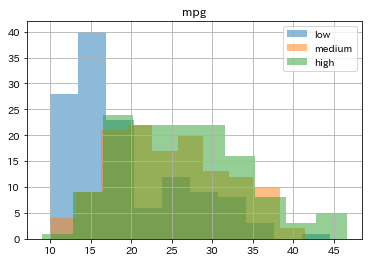

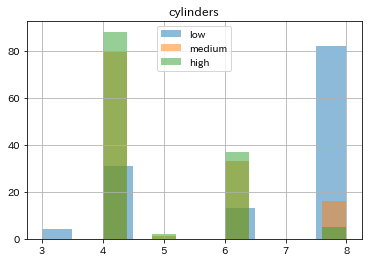

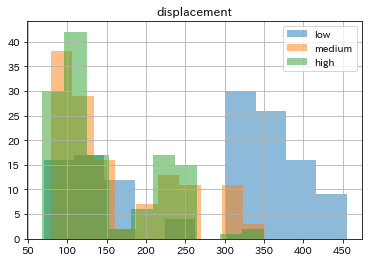

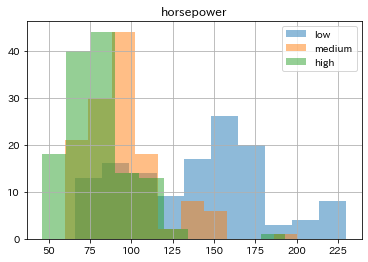

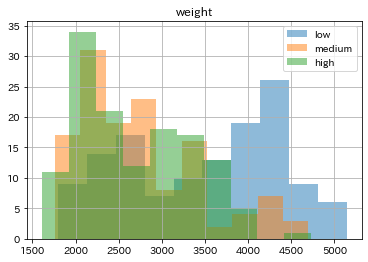

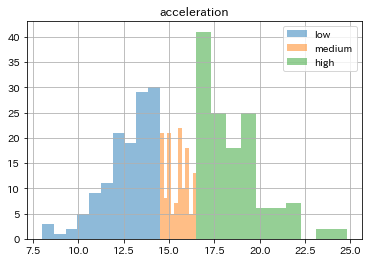

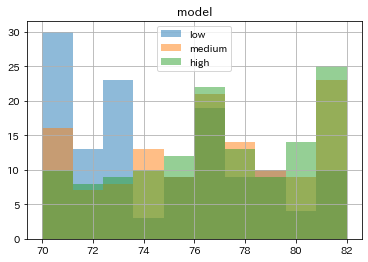

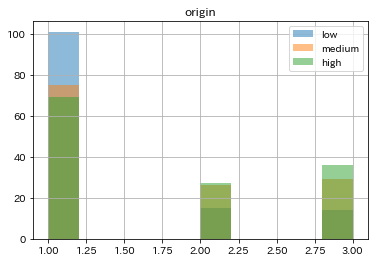

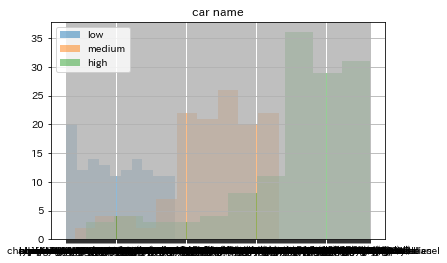

In [59]:
for (l,m, h) in zip(low.iteritems(), medium.iteritems(), high.iteritems()):
    if l[0] == m[0] == h[0]:
        pass
    else:
        raise
    l[1].hist(alpha=.5)
    m[1].hist(alpha=.5)
    h[1].hist(alpha=.5)
    plt.title(l[0])
    plt.legend(["low", "medium", "high"])
    plt.show()